# GANs - Generative Adverserial Networks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

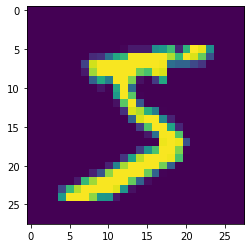

In [4]:
plt.imshow(X_train[0])

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Filtering out the Data for Faster Training on Smaller Dataset

In [6]:
#let's select only zeros
only_zeros  = X_train[y_train==0]

In [7]:
only_zeros.shape

(5923, 28, 28)

In [8]:
X_train.shape

(60000, 28, 28)

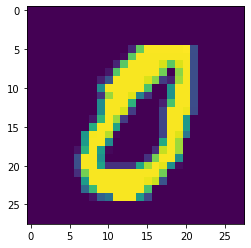

In [9]:
plt.imshow(only_zeros[10])

## Generator & Discriminator

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 100

### Discriminator
- What is real and what is fake ?

In [12]:
discriminator = Sequential()


discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))

#FINAL OUTPUT LAYER
# 1 BECAUSE IT'S BINARY CLASSIFICATION AND ALL WE WANT TO KNOW IF IT'S A FAKE OR REAL IMAGE
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')

## Generator

- We don't compile it because we only train through the GAN model

In [14]:

#784 -- 150 -- 100 -- 150 -- 784
# We have to decide the minimum number
#coding_size = 100 # less than 784 but not too small

generator = Sequential()

generator.add(Dense(100,activation='relu',input_shape=[codings_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))

#we have to reshape the output to match the shape
generator.add(Reshape([28,28]))



In [15]:
GAN = Sequential([generator,discriminator])

In [16]:
discriminator.trainable = False

In [17]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [18]:
batch_size = 32 

In [19]:
#my_data= X_train
my_data = only_zeros

In [20]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [21]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [22]:
my_data.shape

(5923, 28, 28)

In [23]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [24]:
epochs= 1 

In [25]:
GAN.layers

In [26]:
GAN.layers[0].layers

In [27]:
GAN.layers[1].layers

In [28]:
GAN.layers[0].summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [29]:
GAN.layers[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


In [30]:
# Grab the seprate components
generator, discriminator = GAN.layers

# For every epcoh
for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i = 0
    # For every batch in the dataset
    for X_batch in dataset:
        i=i+1
        if i%100 == 0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
        #####################################
        ## TRAINING THE DISCRIMINATOR ######
        ###################################
        
        # Create Noise
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        # Generate numbers based just on noise input
        gen_images = generator(noise)
        
        # Concatenate Generated Images against the Real Ones
        # TO use tf.concat, the data types must match!
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)], axis=0)
        
        # Targets set to zero for fake images and 1 for real images
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
        
        # This gets rid of a Keras warning
        discriminator.trainable = True
        
        # Train the discriminator on this batch
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        
        #####################################
        ## TRAINING THE GENERATOR     ######
        ###################################
        
        # Create some noise
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        # We want discriminator to belive that fake images are real
        y2 = tf.constant([[1.]] * batch_size)
        
        # Avois a warning
        discriminator.trainable = False
        
        GAN.train_on_batch(noise, y2)
        
print("TRAINING COMPLETE")            

Currently on Epoch 1
	Currently on batch number 100 of 185
TRAINING COMPLETE


In [31]:
noise = tf.random.normal(shape=[10, codings_size])#10 fake images

In [32]:
noise.shape 

TensorShape([10, 100])

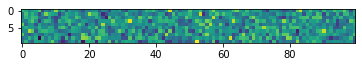

In [33]:
plt.imshow(noise)

In [34]:
image = generator(noise)

In [36]:
image.shape

TensorShape([10, 28, 28])

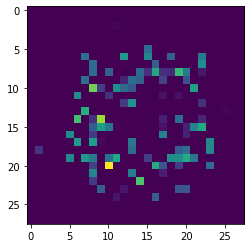

In [35]:
plt.imshow(image[5])

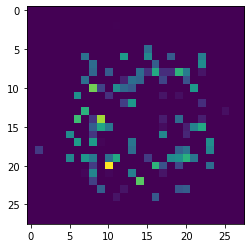

In [37]:
plt.imshow(image[1])